<a href="https://colab.research.google.com/github/JAYANT-101/Machine-learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification using MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
mnist=fetch_openml('mnist_784',as_frame=False)

In [3]:
X,y=mnist.data,mnist.target
print(X)
print(y)
print(X.shape)
print(y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']
(70000, 784)
(70000,)


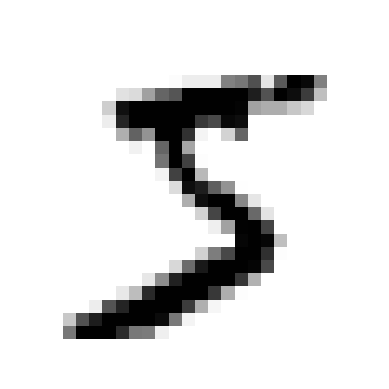

5


In [4]:
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")
some_digit=X[0]
plot_digit(some_digit)
plt.show()
print(y[0])

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

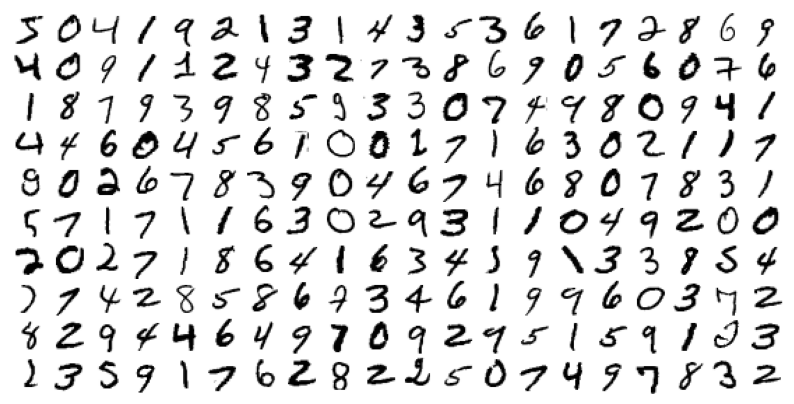

In [6]:
plt.figure(figsize=(10,10))
for idx ,image_data in enumerate(X[:200]):
  plt.subplot(20,20,idx+1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### Testing for only 5 for staters

In [7]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

### Performance measures

Measuring accuracy using cross-valodation

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [14]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Confusion Matrices

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
y_train_perfect_prediction=y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5,y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]])

Precision and Recall

In [19]:
from sklearn.metrics import precision_score,recall_score
print("precision_score", precision_score(y_train_5,y_train_pred))
print("recall_score",recall_score(y_train_5,y_train_pred))

precision_score 0.8370879772350012
recall_score 0.6511713705958311


In [20]:
#F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847